### Patrick Horlaville (260931235) - Problem Set 4 - PHYS 512 : Computational Physics with Applications

Prof: Jon Sievers. TAs: Marcus Merryfield, Rigel Zifkin

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import astropy.units as un

## Problem 1

a)

We first load the data

In [3]:
data = np.load('sidebands.npz')
t = data['time']
d = data['signal']

(array([-5.0e-05,  0.0e+00,  5.0e-05,  1.0e-04,  1.5e-04,  2.0e-04,
         2.5e-04,  3.0e-04,  3.5e-04,  4.0e-04,  4.5e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

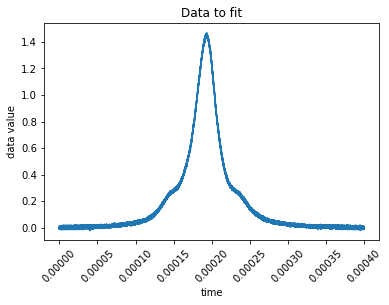

In [10]:
plt.plot(t, d)
plt.xlabel('time')
plt.ylabel('data value')
plt.title('Data to fit')
plt.xticks(rotation = 45)

Now we would like to model the data as a single Lorentzian and use analytic derivatives. To do so, we use Newton's method to carry out the fit. We parametrize the Lorentzian as $d = \frac{a}{1 + (t - t_0)^2/\omega^2}$

From the data, we can come up with initial guesses for the different parameters we will use: amplitude $a$ ~ 1.4, peak location $t_0$ ~ 0.000175 and peak spread $\omega$ ~ 0.00001

Use code snippet from "newton.py" from the modelling directory, adapting it to the form of the model we are using for $d$:

In [27]:
def lor_d(a, t0, w, t):
    return a/(1 + ((t - t0)/w)**2)

In [16]:
def calc_lorentz_d(p, t):
    
    a, t0, w = p[0], p[1], p[2]
    y = a/(1 + ((t - t0)/w)**2)
    grad = np.zeros([t.size, p.size])

    grad[:,0] = 1.0/(p[1] + (t - p[2])**2)
    grad[:,1] = - p[0]/(p[1] + (t - p[2])**2)**2
    grad[:,2] = p[0]*2*(t - p[2])/(p[1] + (t - p[2])**2)**2
    
    return y, grad

In [14]:
p_0 = np.array([1.4, 0.000175, 0.00001])

In [24]:
def newtons_method_lorentz_numerical(data, p, t):
    
    x_true = data['signal']
    p_g = np.copy(p)
    for i in range(100):
        pred, grad = calc_lorentz_d(p_g,t)  
        r = x_true - pred  
        r = np.matrix(r).transpose()  
        grad = np.matrix(grad)
        dp = np.linalg.pinv(grad.transpose()*grad)*(grad.transpose()*r)
 
        for i in range(len(p_g)):
            p_g[i] += dp[i]
        p_g = np.asarray(p_g)
        
    return p_g

In [25]:
res = newtons_method_lorentz_numerical(data, p_0, t)

In [26]:
res

array([1.39999999e+00, 1.76861854e-04, 4.36255317e-04])

In [31]:
calc_d = lor_d(res[0], res[1], res[2], t)

(array([-5.0e-05,  0.0e+00,  5.0e-05,  1.0e-04,  1.5e-04,  2.0e-04,
         2.5e-04,  3.0e-04,  3.5e-04,  4.0e-04,  4.5e-04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

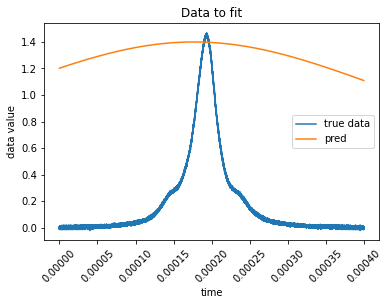

In [32]:
plt.plot(t, d, label = 'true data')
plt.plot(t, calc_d, label = 'pred')
plt.xlabel('time')
plt.ylabel('data value')
plt.title('Data to fit')
plt.legend()
plt.xticks(rotation = 45)